In [7]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('.'))))
import albumentations as A
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
def draw(img, bboxes=None, bboxes_labels=None, kpts=None, kpts_labels=None, color=(0,0,255)):
    img_ = np.array(img)
    if bboxes is not None:
        for idx, bbox in enumerate(bboxes):
            img_ = cv2.rectangle(img_, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), color, 2)
            if bboxes_labels is not None:
                label = bboxes_labels[idx]
                cv2.putText(img_, f'{label}', (int(bbox[0]), int(bbox[1])), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=1, color=color, thickness=2)
    if kpts is not None:
        for idx, kpt in enumerate(kpts):
            img_ = cv2.circle(img_, (int(kpt[0]), int(kpt[1])), 5, color, 5)
            if kpts_labels is not None:
                label = kpts_labels[idx]
                cv2.putText(img_, f'{label}', (int(kpt[0]), int(kpt[1])), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=1, color=color, thickness=2)
                
    return img_

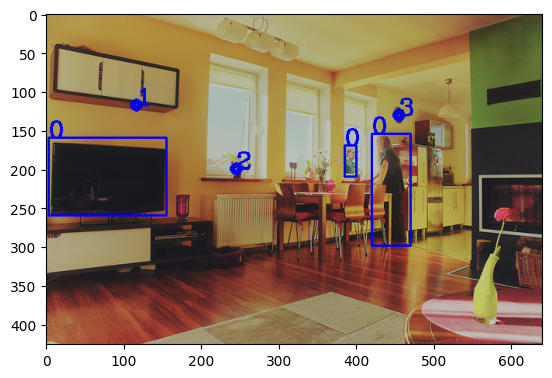

In [12]:
img_file = r'/data/ylw/code/yolo/yolox-pytorch/yolox-v1/img/001.jpg'
img = np.array(Image.open(img_file))
bbox = np.array([[420,155, 470,299], [385,170,400,210], [3,160,155,260]])
bbox_label = np.array(['0','0','0'])
kpts = np.array([[116,118], [245,200], [455,131]])
# kpts_label = np.array([1,2,3])
kpts_label = np.array(['1','2','3'])

img_ = draw(img.copy(), bbox, bbox_label, kpts=kpts, kpts_labels=kpts_label, color=(0, 0, 255))
plt.imshow(img_);

In [ ]:
trans = A.Compose(
    [
        # A.HorizontalFlip(p=1.0), 
        # A.RandomBrightnessContrast(p=1.0),
        # # A.Rotate(90, p=1.0),
        # A.SafeRotate(90, border_mode=cv2.BORDER_CONSTANT, p=1.0), 
        # A.Resize(width=640, height=640), 
        A.Affine(scale=0.5, rotate=90, mode=cv2.BORDER_CONSTANT, p=1.0), 
        A.PadIfNeeded(min_height=640, min_width=640, border_mode=cv2.BORDER_CONSTANT, p=1.0)
    ], 
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['bbox_classes']), 
    keypoint_params=A.KeypointParams(format='xy', label_fields=['kpts_classes'])
)

trans_data = trans(image=img.copy(), bboxes=bbox, bbox_classes=bbox_label, keypoints=kpts, kpts_classes=kpts_label)
img_, bboxes_, bbox_labels_, kpts_, kpts_label_ = trans_data['image'], np.array(trans_data['bboxes']), np.array(trans_data['bbox_classes']), np.array(trans_data['keypoints']), np.array(trans_data['kpts_classes'])

img_ = draw(img_, bboxes_, bbox_labels_, kpts_, kpts_label_, color=(255, 0, 0))
plt.imshow(img_);

In [ ]:
trans1 = A.Compose(
    [
        A.SafeRotate(np.random.randint(0, 90), border_mode=cv2.BORDER_CONSTANT, p=1.0), 
        A.PadIfNeeded(min_height=640, min_width=640, border_mode=cv2.BORDER_CONSTANT, p=1.0)
    ], 
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['bbox_classes']), 
    keypoint_params=A.KeypointParams(format='xy', label_fields=['kpts_classes'])
)

trans_data = trans1(image=img.copy(), bboxes=bbox, bbox_classes=bbox_label, keypoints=kpts, kpts_classes=kpts_label)
img_, bboxes_, bbox_labels_, kpts_, kpts_label_ = trans_data['image'], np.array(trans_data['bboxes']), np.array(trans_data['bbox_classes']), np.array(trans_data['keypoints']), np.array(trans_data['kpts_classes'])

img_ = draw(img_, bboxes_, bbox_labels_, kpts_, kpts_label_, color=(255, 0, 0))
plt.imshow(img_);

In [ ]:
trans2 = A.Compose(
    [
        # A.Affine(scale=np.random.randint(8,12)/10, rotate=np.random.randint(0, 90), keep_ratio=True, mode=cv2.BORDER_CONSTANT, p=1.0), 
        # A.Affine(scale=np.random.randint(8,12)/10, rotate=45, keep_ratio=True, mode=cv2.BORDER_CONSTANT, p=1.0), 
        A.SafeRotate(np.random.randint(0, 90), border_mode=cv2.BORDER_CONSTANT, p=1.0), 
        # A.Resize(width=640, height=640), 
        A.ColorJitter(brightness=0.3, hue=0.3, saturation=0.3, contrast=0.3, p=0.5), 
        A.PadIfNeeded(min_height=640, min_width=640, border_mode=cv2.BORDER_CONSTANT, p=1.0)
    ], 
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['bbox_classes']), 
    keypoint_params=A.KeypointParams(format='xy', label_fields=['kpts_classes'])
)
A.NoOp()
trans_data = trans2(image=img.copy(), bboxes=bbox, bbox_classes=bbox_label, keypoints=kpts, kpts_classes=kpts_label)
img_, bboxes_, bbox_labels_, kpts_, kpts_label_ = trans_data['image'], np.array(trans_data['bboxes']), np.array(trans_data['bbox_classes']), np.array(trans_data['keypoints']), np.array(trans_data['kpts_classes'])

img_ = draw(img_, bboxes_, bbox_labels_, kpts_, kpts_label_, color=(255, 0, 0))
plt.imshow(img_);

In [ ]:
trans1 = A.Compose(
    [
        A.SafeRotate(np.random.randint(0, 90), border_mode=cv2.BORDER_CONSTANT, p=1.0), 
        A.PadIfNeeded(min_height=640, min_width=640, border_mode=cv2.BORDER_CONSTANT, p=1.0)
    ], 
    # bbox_params=A.BboxParams(format='pascal_voc', label_fields=['bbox_classes']), 
    # keypoint_params=A.KeypointParams(format='xy', label_fields=['kpts_classes'])
)

trans2 = A.Compose(
    [
        A.SafeRotate(np.random.randint(0, 90), border_mode=cv2.BORDER_CONSTANT, p=1.0), 
        A.ColorJitter(), 
        A.PadIfNeeded(min_height=640, min_width=640, border_mode=cv2.BORDER_CONSTANT, p=1.0)
    ], 
    # bbox_params=A.BboxParams(format='pascal_voc', label_fields=['bbox_classes']), 
    # keypoint_params=A.KeypointParams(format='xy', label_fields=['kpts_classes'])
)



trans = A.Compose(
    [
        ########################################################################
        # OneOf这种op，容易有一种情况：什么都不选，就是一个空的。
        ########################################################################
        # A.OneOf(
        #     [
        #         trans1, 
        #         trans2
        #     ]
        # ), 
        ########################################################################
        # OneOrOther：保证一定有op。
        ########################################################################
        A.OneOrOther(
            first=trans1, second=trans2#, transforms=A.PadIfNeeded(min_height=640, min_width=640, border_mode=cv2.BORDER_CONSTANT, p=1.0)
        ), 
    ], 
    bbox_params=A.BboxParams(format='pascal_voc', label_fields=['bbox_classes']), 
    keypoint_params=A.KeypointParams(format='xy', label_fields=['kpts_classes'])
)

trans_data = trans(image=img.copy(), bboxes=bbox, bbox_classes=bbox_label, keypoints=kpts, kpts_classes=kpts_label)
img_, bboxes_, bbox_labels_, kpts_, kpts_label_ = trans_data['image'], np.array(trans_data['bboxes']), np.array(trans_data['bbox_classes']), np.array(trans_data['keypoints']), np.array(trans_data['kpts_classes'])

img_ = draw(img_, bboxes_, bbox_labels_, kpts_, kpts_label_, color=(255, 0, 0))
plt.imshow(img_);

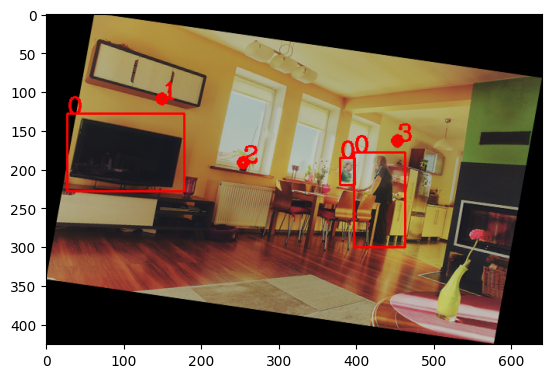

In [22]:
img_file = r'/data/ylw/code/yolo/yolox-pytorch/yolox-v1/img/001.jpg'
img = np.array(Image.open(img_file))
bbox = np.array([[420,155, 470,299], [385,170,400,210], [3,160,155,260]])
bbox_label = np.array(['0','0','0'])
kpts = np.array([[116,118], [245,200], [455,131]])
# kpts_label = np.array([1,2,3])
kpts_label = np.array(['1','2','3'])




bbox_params=A.BboxParams(format='pascal_voc', label_fields=['bbox_classes'])
# keypoint_params=A.KeypointParams(format='xy', label_fields=['kpts_classes'])
keypoint_params=A.KeypointParams(format='xy')

trans = A.Compose(
    [
        # A.OneOf(
        #     [
        #         A.NoOp(), 
        #         A.ColorJitter(brightness=0.3, hue=0.3, saturation=0.3, contrast=0.3, p=0.5),
        #     ]
        # ), 
        A.SafeRotate(np.random.randint(0, 90), border_mode=cv2.BORDER_CONSTANT, p=1.0), 
        # A.PadIfNeeded(min_height=640, min_width=640, border_mode=cv2.BORDER_CONSTANT, p=1.0), 
        # A.Resize(height=640, width=640, p=1.0)
    ], 
    bbox_params=bbox_params, 
    keypoint_params=keypoint_params
)

# trans_data = trans(image=img.copy(), bboxes=bbox, bbox_classes=bbox_label, keypoints=kpts, kpts_classes=kpts_label)
trans_data = trans(image=img.copy(), bboxes=bbox, bbox_classes=bbox_label, keypoints=kpts)
# img_, bboxes_, bbox_labels_, kpts_, kpts_label_ = trans_data['image'], np.array(trans_data['bboxes']), np.array(trans_data['bbox_classes']), np.array(trans_data['keypoints']), np.array(trans_data['kpts_classes'])
# trans_data = trans(image=img_.copy(), bboxes=None, bbox_classes=None, keypoints=None, kpts_classes=None)
# trans_data = trans(image=img.copy())
# img_, bboxes_, bbox_labels_, kpts_, kpts_label_ = trans_data['image'], np.array(trans_data['bboxes']), np.array(trans_data['bbox_classes']), np.array(trans_data['keypoints']), np.array(trans_data['kpts_classes'])
img_, bboxes_, bbox_labels_, kpts_ = trans_data['image'], np.array(trans_data['bboxes']), np.array(trans_data['bbox_classes']), np.array(trans_data['keypoints'])
# img_ = trans_data['image']
img_ = draw(img_, bboxes_, bbox_labels_, kpts_, kpts_label_, color=(255, 0, 0))
# img_ = draw(img_, bboxes_, bbox_labels_, color=(255, 0, 0))
plt.imshow(img_);

In [ ]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('.'))))
import albumentations as A
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2


from torchvision.prototype import transforms

In [ ]:
img_file = r'/data/ylw/code/yolo/yolox-pytorch/yolox-v1/img/001.jpg'
img = np.array(Image.open(img_file))
bbox = np.array([[420,155, 470,299], [385,170,400,210], [3,160,155,260]])
bbox_label = np.array(['0','0','0'])
kpts = np.array([[116,118], [245,200], [455,131]])
# kpts_label = np.array([1,2,3])
kpts_label = np.array(['1','2','3'])



In [ ]:
img_ = draw(img.copy(), bbox, bbox_label, kpts=kpts, kpts_labels=kpts_label, color=(0, 0, 255))
plt.imshow(img_);


# Exactly the same interface as V1:
trans = transforms.Compose([
    transforms.ColorJitter(contrast=0.5),
    transforms.RandomRotation(30),
    transforms.CenterCrop(480),
])
imgs, bboxes, labels = trans(imgs, bboxes, labels)

In [ ]:
import PIL
from torchvision import io, utils
from torchvision import transforms as T
from torchvision import features
from torchvision.transforms import functional as F
# from torchvision.prototype import features, transforms as T
# from torchvision.prototype.transforms import functional as F
# Defining and wrapping input to appropriate Tensor Subclasses
path = r'/data/ylw/code/yolo/yolox-pytorch/yolox-v1/img/001.jpg'
img = features.Image(io.read_image(path), color_space=features.ColorSpace.RGB)
# img = PIL.Image.open(path)
bboxes = features.BoundingBox(
    [[2, 0, 206, 253], [396, 92, 479, 241], [328, 253, 417, 332],
     [148, 68, 256, 182], [93, 158, 170, 260], [432, 0, 438, 26],
     [422, 0, 480, 25], [419, 39, 424, 52], [448, 37, 456, 62],
     [435, 43, 437, 50], [461, 36, 469, 63], [461, 75, 469, 94],
     [469, 36, 480, 64], [440, 37, 446, 56], [398, 233, 480, 304],
     [452, 39, 463, 63], [424, 38, 429, 50]],
    format=features.BoundingBoxFormat.XYXY,
    spatial_size=F.get_spatial_size(img),
)
labels = features.Label([59, 58, 50, 64, 76, 74, 74, 74, 74, 74, 74, 74, 74, 74, 50, 74, 74])
# Defining and applying Transforms V2
trans = T.Compose(
    [
        T.ColorJitter(contrast=0.5),
        T.RandomRotation(30),
        T.CenterCrop(480),
    ]
)
img, bboxes, labels = trans(img, bboxes, labels)
# Visualizing results
viz = utils.draw_bounding_boxes(F.to_image_tensor(img), boxes=bboxes)
F.to_pil_image(viz).show()

In [ ]:
import torchvision as tv
tv.__version__

In [11]:
import cv2
import numpy as np
import albumentations as A
# from albumentations.augmentations.bbox_utils import denormalize_bbox, normalize_bbox


def mosaic_augmentation(image, boxes, labels, p=1.0):
    # 将输入的图像和标注转换为Albumentations所需的格式
    bboxes = []
    for box in boxes:
        bboxes.append([box[0], box[1], box[0] + box[2], box[1] + box[3]])
    bboxes = np.array(bboxes)
    labels = np.array(labels)
    
    # 定义Mosaic数据增强的转换器
    transform = A.Compose([
        A.Affine(scale=0.9, rotate=0, keep_ratio=True, p=1.0), 
        # A.RandomSizedBBoxSafeCrop(512, 512, erosion_rate=0.0, interpolation=cv2.INTER_CUBIC, p=p),
        # A.OneOf([
        #     A.HueSaturationValue(hue_shift_limit=0.1, sat_shift_limit=0.3, val_shift_limit=0.3, p=0.9),
        #     A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.9),
        # ], p=0.9),
        # A.ToGray(p=0.01),
        # A.HorizontalFlip(p=0.5),
        # A.VerticalFlip(p=0.5),
        # A.Resize(512, 512),
        # # A.Mosaic(p=1.0),
        # A.Normalize(),
        # # A.pytorch.ToTensorV2()
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))
    
    # 将图像和标注转换为Albumentations所需的格式
    transformed = transform(image=image, bboxes=bboxes, labels=labels)
    
    # 将转换后的图像和标注返回
    transformed_image = transformed['image']
    transformed_boxes = transformed['bboxes']
    transformed_labels = transformed['labels']
    
    # 将转换后的标注转换为原始格式
    mosaic_boxes = []
    for box in transformed_boxes:
        x, y, w, h = box
        mosaic_boxes.append([x, y, w - x, h - y])
    mosaic_boxes = np.array(mosaic_boxes)
    
    return transformed_image, mosaic_boxes, transformed_labels

# 示例用法
image = cv2.imread('/data/ylw/code/yolo/yolox-pytorch/yolox-v1/img/001.jpg')
print(f'{image.shape=}')
boxes = [[100, 100, 200, 200], [200, 200, 300, 300]]
labels = [0, 1]

transformed_image, mosaic_boxes, transformed_labels = mosaic_augmentation(image, boxes, labels)

image = draw(image, np.array(bboxes), np.array(labels))
plt.imshow(image)

image.shape=(426, 640, 3)


ValueError: Expected y_max for bbox (0.3125, 0.4694835680751174, 0.78125, 1.1737089201877935, 1) to be in the range [0.0, 1.0], got 1.1737089201877935.